In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


In [25]:
#data wrangling start
df = pd.read_csv('coffee.csv')

df.info()

In [26]:
df.describe()

,Open,High,Low,Close,Volume
count,5746.000000,5746.000000,5746.000000,5746.000000,5746.000000
mean,127.267635,128.847034,125.784669,127.215567,8807.178907
std,50.569425,51.164948,49.851487,50.506519,9612.789034
min,41.500000,42.000000,41.500000,41.500000,0.000000
25%,98.800000,100.112500,97.862500,98.650000,61.000000
50%,120.400000,121.600000,118.950000,120.250000,7008.000000
75%,144.800000,146.000000,143.000000,144.337500,14497.750000
max,305.300000,306.250000,304.000000,304.900000,62045.000000


In [27]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
Currency            object
dtype: object


In [28]:
unique_counts = df.nunique()
unique_percents = (unique_counts / len(df)) * 100
print(unique_percents)

Date        100.000000
Open         43.247477
High         44.796380
Low          45.057431
Close        47.024017
Volume       64.601462
Currency      0.017403
dtype: float64


In [29]:
ranges = df.select_dtypes(include=['number']).agg(['min', 'max'])
print(ranges)

      Open    High    Low  Close  Volume
min   41.5   42.00   41.5   41.5       0
max  305.3  306.25  304.0  304.9   62045


In [30]:
missing_values = df.isnull().sum()

print(missing_values)

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64


In [31]:
# data wrangling end

In [32]:
# EDA START
column_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes,
    'Unique Values Count': df.nunique(),
    'Unique Values Percent': (df.nunique() / len(df)) * 100
})

print("Column Information:")
print(column_info)

Column Information:
         Column Name       Data Type  Unique Values Count  \
Date            Date  datetime64[ns]                 5746   
Open            Open         float64                 2485   
High            High         float64                 2574   
Low              Low         float64                 2589   
Close          Close         float64                 2702   
Volume        Volume           int64                 3712   
Currency    Currency          object                    1   

          Unique Values Percent  
Date                 100.000000  
Open                  43.247477  
High                  44.796380  
Low                   45.057431  
Close                 47.024017  
Volume                64.601462  
Currency               0.017403  


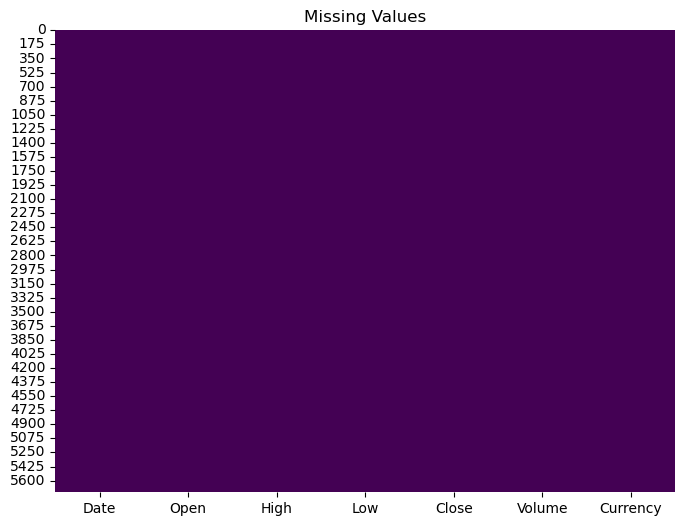

In [37]:
# Visualize missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values')
plt.show()
# ^ no missing values

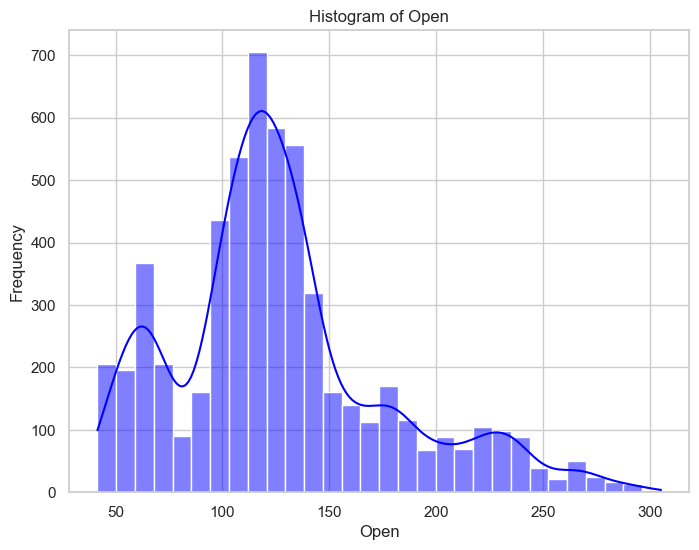

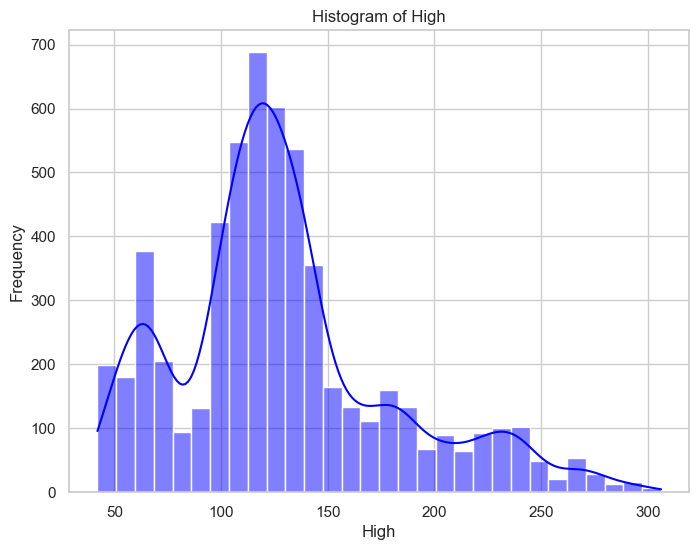

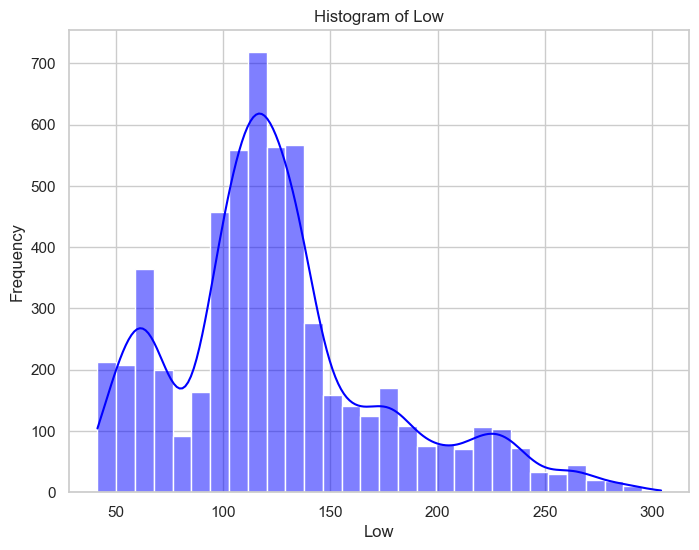

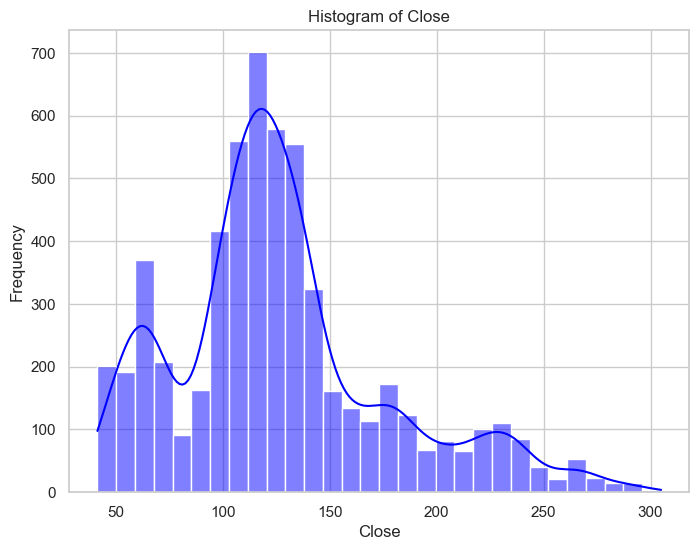

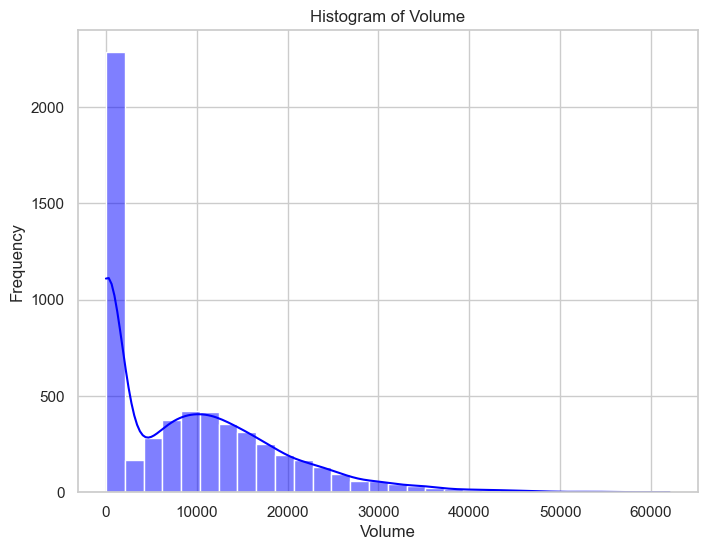

<Figure size 1200x1200 with 0 Axes>

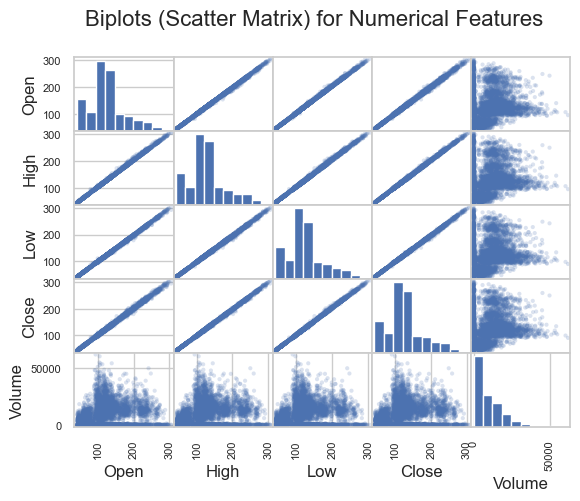

In [45]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# biplots for feature combinations (scatter matrix)
plt.figure(figsize=(12, 12))
scatter_matrix(df[numerical_features.columns], alpha=0.2, diagonal='hist')
plt.suptitle('Biplots (Scatter Matrix) for Numerical Features', size=16)
plt.show()

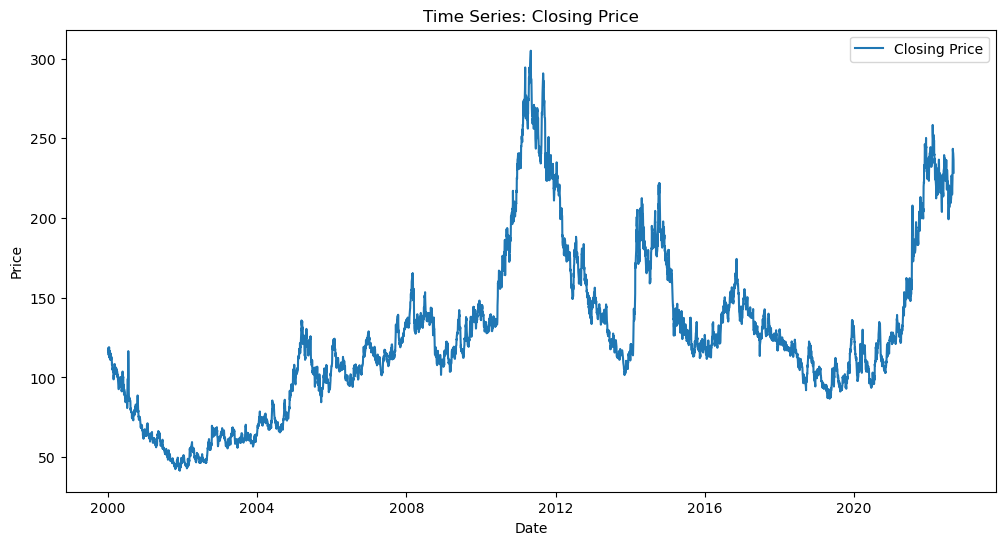

In [38]:
# Visualize time series data, this shows the closing price for the price of coffee over the wears by its price in USD.
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Time Series: Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

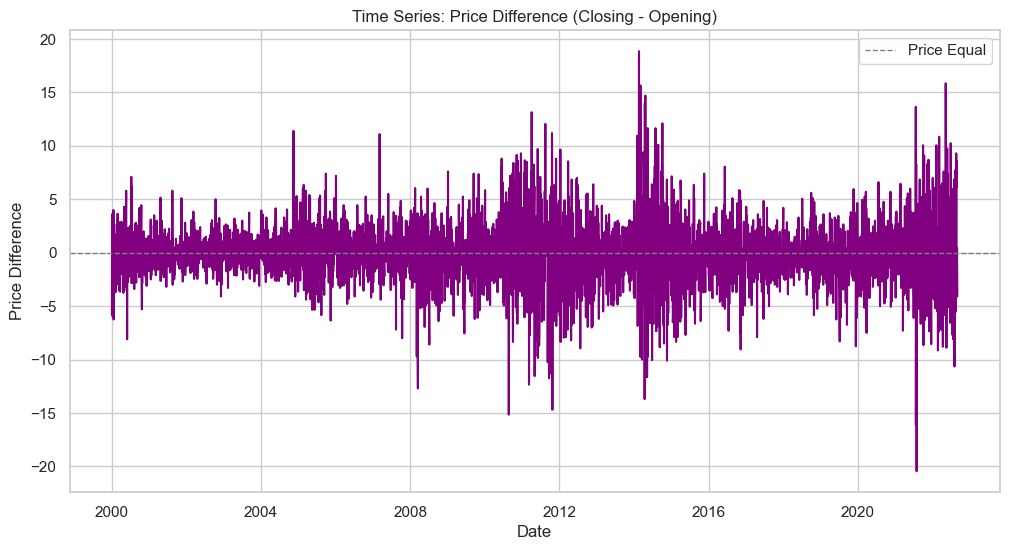

In [47]:
# Calculate the price difference (Close - Open)
df['Price Difference'] = df['Close'] - df['Open']

# Create a time series graph for the price difference
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price Difference'], color='purple')
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Price Equal')
plt.title('Time Series: Price Difference (Closing - Opening)')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.show()

In [48]:
# Calculate Pearson correlation coefficients
correlation_matrix = df.corr()

# Print the correlation matrix
print("Pearson Correlation Coefficients:")
print(correlation_matrix)

Pearson Correlation Coefficients:
                      Open      High       Low     Close    Volume  \
Open              1.000000  0.999366  0.999368  0.998644  0.111907   
High              0.999366  1.000000  0.999129  0.999346  0.120768   
Low               0.999368  0.999129  1.000000  0.999361  0.104490   
Close             0.998644  0.999346  0.999361  1.000000  0.113157   
Volume            0.111907  0.120768  0.104490  0.113157  1.000000   
Price Difference -0.049910 -0.024260 -0.024030  0.002157  0.021304   

                  Price Difference  
Open                     -0.049910  
High                     -0.024260  
Low                      -0.024030  
Close                     0.002157  
Volume                    0.021304  
Price Difference          1.000000  


C:\Users\chill\AppData\Local\Temp\ipykernel_14292\2075169858.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


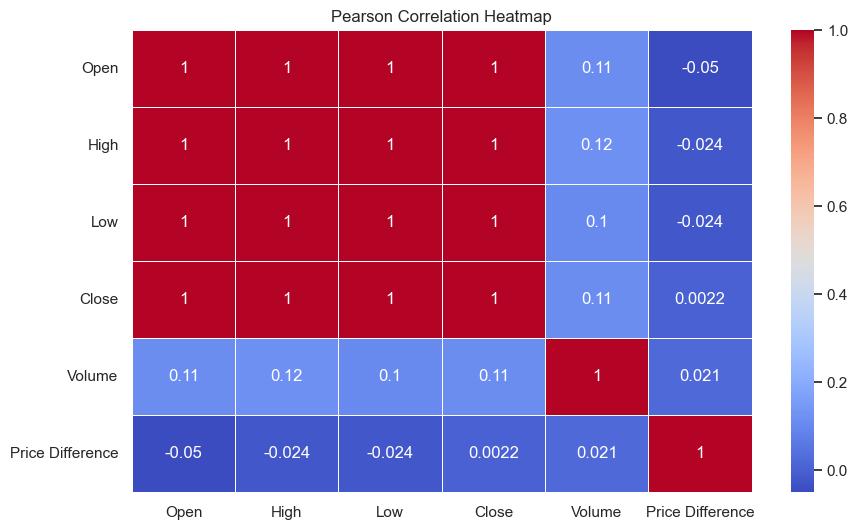

In [49]:
# correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [ ]:
# EDA END